<a href="https://colab.research.google.com/github/Anusarakh/DPDM2021/blob/main/DPDM2021_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ข้อมูลจาก website  kaggle.com

https://www.kaggle.com/kimjihoo/coronavirusdataset  

ข้อมูล Covid19  ในเกาหลีใต้

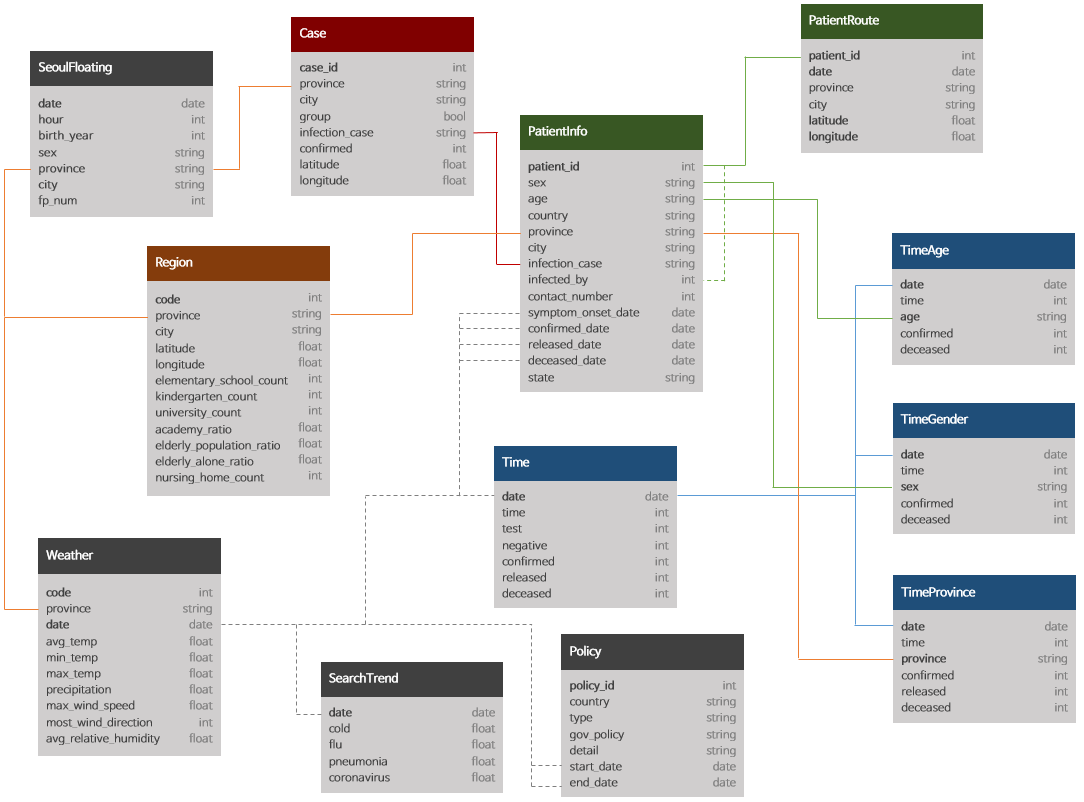

## 1. รายการของตารางข้อมูล
1) case  กรณี: ข้อมูลกรณีติดเชื้อ COVID-19 ในเกาหลีใต้

2) Patient Data ข้อมูลผู้ป่วย

* PatientInfo: ข้อมูลทางระบาดวิทยาของผู้ป่วย COVID-19 ในเกาหลีใต้

* PatientRoute: ข้อมูลเส้นทางของผู้ป่วย COVID-19 ในเกาหลีใต้ (ไม่พร้อมใช้งานในขณะนี้)

3) Time Series Data ข้อมูลอนุกรมเวลา

* Time : ข้อมูลอนุกรมเวลาของสถานะ COVID-19 ในเกาหลีใต้

* TimeAge: ข้อมูลอนุกรมเวลาของสถานะ COVID-19 ในแง่ของอายุในเกาหลีใต้

* TimeGender: ข้อมูลอนุกรมเวลาของสถานะ COVID-19 ในแง่ของเพศในเกาหลีใต้

* TimeProvince: ข้อมูลอนุกรมเวลาของสถานะ COVID-19 ในแง่ของจังหวัดในเกาหลีใต้

4) Additional Data ข้อมูลเพิ่มเติม

* Region ภูมิภาค: ที่ตั้งและข้อมูลสถิติของภูมิภาคในเกาหลีใต้

* Weather สภาพอากาศ: ข้อมูลสภาพอากาศในภูมิภาคของเกาหลีใต้

* SearchTrend: ข้อมูลแนวโน้มของคำหลักที่ค้นหาใน NAVER ซึ่งเป็นหนึ่งในพอร์ทัลที่ใหญ่ที่สุดในเกาหลีใต้

* SeoulFloating: ข้อมูลประชากรลอยตัวในกรุงโซล ประเทศเกาหลีใต้ (จาก SK Telecom Big Data Hub)

* Policy นโยบาย: ข้อมูลนโยบายรัฐบาลสำหรับ COVID-19 ในเกาหลีใต้



# โจทย์ 

* 1.ทำการ Visualization แสดงจังหวัดที่มีกลุ่มผู้ติดเชื้อมากที่สุด 10 อันดับแรก และจังหวัดที่มากที่สุด มีจำนวนผู้ติดเชื้อเพศชาย และเพศหญิง กี่คน

* 2.ทำการ Visualization แสดงจำนวน Country ที่มีจำนวนผู้ป่วยอยู่ในช่วงอายุ 60 ปี ขึ้นไป พร้อมจำนวน และสาเหตุของการติดเชื้อ

In [1]:
import pandas as pd # เริ่มทำงานกับข้อมูลลักษณะ ตาราง

In [2]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

# ข้อ 1 ทำการ Visualization แสดงจังหวัดที่มีกลุ่มผู้ติดเชื้อมากที่สุด 10 อันดับแรก และจังหวัดที่มากที่สุด มีจำนวนผู้ติดเชื้อเพศชาย และเพศหญิง กี่คน

## ขั้นที่ 1 ดึงตารางข้อมูลจาก Google Drive จำนวน 4 ตาราง
* 1.ตาราง PatientInfo
* 2.ตาราง Case
* 3.ตาราง TimeProvince 
* 4.ตาราง Policy

In [4]:
path = '/content/drive/My Drive/DPDM2021_DATA/Project/Covid-19_in_SouthKorea' # เรียกข้อมูลจาก Drive 
Patient = pd.read_csv(os.path.join(path,'PatientInfo.csv')) # ชื่อไฟล์ข้อมูล PatientInfo.csv
Patient  # เรียกดูตาราง 

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [5]:
Case = pd.read_csv(os.path.join(path,'Case.csv')) # ชื่อไฟล์ข้อมูล 
Case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-
171,7000002,Jeju-do,-,False,contact with patient,0,-,-
172,7000003,Jeju-do,-,False,etc,4,-,-


In [6]:
TimeProvince = pd.read_csv(os.path.join(path,'TimeProvince.csv')) # ชื่อไฟล์ข้อมูล 
TimeProvince

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,Jeollabuk-do,27,21,0
2767,2020-06-30,0,Jeollanam-do,24,19,0
2768,2020-06-30,0,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,0,Gyeongsangnam-do,134,128,0


In [7]:
Policy = pd.read_csv(os.path.join(path,'Policy.csv')) # ชื่อไฟล์ข้อมูล 
Policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


## ขั้นตอนที่ 2 ทำการตรวจ missing value

### ตรวจสอบค่า missing ในตาราง Patient

In [8]:
Patient.isnull().any() # ตรวจสอบ missing จากตาราง Patient

patient_id            False
sex                    True
age                    True
country               False
province              False
city                   True
infection_case         True
infected_by            True
contact_number         True
symptom_onset_date     True
confirmed_date         True
released_date          True
deceased_date          True
state                 False
dtype: bool

### แทนค่า missing  ในคอลัม Sex  เนื่องจากมีค่า missing

In [9]:
Patient[['sex']].dropna().mode().iloc[0,0] # แทนค่า missing ด้วยค่า mode 

'female'

In [10]:
Patient[['sex']] = Patient[['sex']].fillna(Patient[['sex']].dropna().mode().iloc[0,0])  # แทนค่า missing ด้วยค่า mod  เนื่องจากข้อมูลเชิงคุณภาพ

In [11]:
Patient.isnull().any() # ตรวจสอบ missing จากตาราง Patient

patient_id            False
sex                   False
age                    True
country               False
province              False
city                   True
infection_case         True
infected_by            True
contact_number         True
symptom_onset_date     True
confirmed_date         True
released_date          True
deceased_date          True
state                 False
dtype: bool

### ตรวจสอบค่า missing ในตาราง Case  

In [12]:
Case.isnull().any() # ไม่มี missing ในตาราง case

 case_id          False
province          False
city              False
group             False
infection_case    False
confirmed         False
latitude          False
longitude         False
dtype: bool

### ตรวจสอบค่า missing ในตาราง TimeProvince

In [13]:
TimeProvince.isnull().any() # ไม่มี missing ในตาราง Time

date         False
time         False
province     False
confirmed    False
released     False
deceased     False
dtype: bool

## ขั้นตอนที่ 3 ทำการเชื่อมตาราง 3 ตาราง คือ ตาราง Patient Case และ Timeprovince

In [14]:
Patient_Case = pd.merge(Patient,Case,on='province')# เชื่อมตาราง Patient กับ Case ด้วย .merge ใช้ province เป็นคีย์
Patient_Case

,patient_id,sex,age,country,province,city_x,infection_case_x,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,case_id,city_y,group,infection_case_y,confirmed,latitude,longitude
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000002,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000003,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000004,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000005,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104118,7000000018,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-
104119,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000001,-,False,overseas inflow,14,-,-
104120,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000002,-,False,contact with patient,0,-,-
104121,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000003,-,False,etc,4,-,-


In [15]:
datamerge = pd.merge(Patient_Case,TimeProvince,on='province')# เชื่อมตาราง Patient_Case กับ TimeProvince ด้วย .merge ใช้ province เป็นคีย์
datamerge

,patient_id,sex,age,country,province,city_x,infection_case_x,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,case_id,city_y,group,infection_case_y,confirmed_x,latitude,longitude,date,time,confirmed_y,released,deceased
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-20,16,0,0,0
1,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-21,16,0,0,0
2,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-22,16,0,0,0
3,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-23,16,0,0,0
4,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-24,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16972044,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-26,0,19,16,0
16972045,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-27,0,19,16,0
16972046,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-28,0,19,16,0
16972047,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-29,0,19,16,0


### เมื่อรวมตารางแล้ว ทำการตรวจสอบ Missing อีกครั้ง

In [16]:
datamerge.isnull().any()

patient_id            False
sex                   False
age                    True
country               False
province              False
city_x                 True
infection_case_x       True
infected_by            True
contact_number         True
symptom_onset_date     True
confirmed_date         True
released_date          True
deceased_date          True
state                 False
 case_id              False
city_y                False
group                 False
infection_case_y      False
confirmed_x           False
latitude              False
longitude             False
date                  False
time                  False
confirmed_y           False
released              False
deceased              False
dtype: bool

### ชี้ตารางเลือกข้อมูลที่สนใจ

In [17]:
datamerge1 = datamerge[['patient_id','sex','country','province','state','group','date','time']] # ชี้ตาราง เพื่อเลือกข้อมูลที่สนใจ
datamerge1

,patient_id,sex,country,province,state,group,date,time
0,1000000001,male,Korea,Seoul,released,True,2020-01-20,16
1,1000000001,male,Korea,Seoul,released,True,2020-01-21,16
2,1000000001,male,Korea,Seoul,released,True,2020-01-22,16
3,1000000001,male,Korea,Seoul,released,True,2020-01-23,16
4,1000000001,male,Korea,Seoul,released,True,2020-01-24,16
...,...,...,...,...,...,...,...,...
16972044,7000000019,female,Bangladesh,Jeju-do,isolated,True,2020-06-26,0
16972045,7000000019,female,Bangladesh,Jeju-do,isolated,True,2020-06-27,0
16972046,7000000019,female,Bangladesh,Jeju-do,isolated,True,2020-06-28,0
16972047,7000000019,female,Bangladesh,Jeju-do,isolated,True,2020-06-29,0


## ขั้นตอนที่ 4 ทำการ visualization  
* จังหวัดที่มีผู้ติดเชื้อมากที่สุด 10 จังหวัดแรก 
* จำนวนเพศชายและหญิง ในจังหวัดที่มีผ๔ชู้ติดเชื้อมากที่สุด

### เลือกจังหวัดที่ทีกลุ่มผู้ติดเชื้อมากที่สุด 10  อันดับแรก

In [18]:
GroupTrue = datamerge1[datamerge1['group']==True] # เลือก Group ที่แสดงค่า true เนื่องจากคือกลุ่มผู้ที่มีเชื้อ
GroupTrue

,patient_id,sex,country,province,state,group,date,time
0,1000000001,male,Korea,Seoul,released,True,2020-01-20,16
1,1000000001,male,Korea,Seoul,released,True,2020-01-21,16
2,1000000001,male,Korea,Seoul,released,True,2020-01-22,16
3,1000000001,male,Korea,Seoul,released,True,2020-01-23,16
4,1000000001,male,Korea,Seoul,released,True,2020-01-24,16
...,...,...,...,...,...,...,...,...
16972044,7000000019,female,Bangladesh,Jeju-do,isolated,True,2020-06-26,0
16972045,7000000019,female,Bangladesh,Jeju-do,isolated,True,2020-06-27,0
16972046,7000000019,female,Bangladesh,Jeju-do,isolated,True,2020-06-28,0
16972047,7000000019,female,Bangladesh,Jeju-do,isolated,True,2020-06-29,0


In [19]:
province_of_true = GroupTrue.groupby('province').count().sort_values(by=['group'],ascending=False).reset_index() # groupby รายจังหวัดที่มีกลุ่มผู้ติดเชื้อ
province_of_true

,province,patient_id,sex,country,state,group,date,time
0,Seoul,7484960,7484960,7484960,7484960,7484960,7484960,7484960
1,Gyeonggi-do,3741176,3741176,3741176,3741176,3741176,3741176,3741176
2,Gyeongsangbuk-do,2044020,2044020,2044020,2044020,2044020,2044020,2044020
3,Incheon,223636,223636,223636,223636,223636,223636,223636
4,Gyeongsangnam-do,195111,195111,195111,195111,195111,195111,195111
5,Busan,172291,172291,172291,172291,172291,172291,172291
6,Daegu,156317,156317,156317,156317,156317,156317,156317
7,Chungcheongnam-do,136920,136920,136920,136920,136920,136920,136920
8,Daejeon,135779,135779,135779,135779,135779,135779,135779
9,Gangwon-do,51345,51345,51345,51345,51345,51345,51345


In [20]:
Top_10 = province_of_true[['province','group']] # เลือกคอลัมล์ที่สนใจ
Top_10

,province,group
0,Seoul,7484960
1,Gyeonggi-do,3741176
2,Gyeongsangbuk-do,2044020
3,Incheon,223636
4,Gyeongsangnam-do,195111
5,Busan,172291
6,Daegu,156317
7,Chungcheongnam-do,136920
8,Daejeon,135779
9,Gangwon-do,51345


  ได้จังหวัดที่มีจำนวนผู้ติดเชื้อ 10 อันดับแรก

In [21]:
Top_10.head(10) # เลือกจังหวัดที่มีผู้ติดเชื้อ 10 อันดับแรก

,province,group
0,Seoul,7484960
1,Gyeonggi-do,3741176
2,Gyeongsangbuk-do,2044020
3,Incheon,223636
4,Gyeongsangnam-do,195111
5,Busan,172291
6,Daegu,156317
7,Chungcheongnam-do,136920
8,Daejeon,135779
9,Gangwon-do,51345


### ทำการพล็อตกราฟ แสดง 10 จังหวัดในเกาหลีใต้ที่ติดเชื้อมากที่สุด

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
labels = ['Seoul', 'Gyeonggi-do', 'Gyeongsangbuk-do', 'Incheon', 'Gyeongsangnam-do', 'Busan','Daegu','Chungcheongnam-do','Daejeon','Gangwon-do']
Numgroup = [7484960, 3741176, 2044020, 223636, 195111, 172291, 156317, 136920, 135779, 51345]

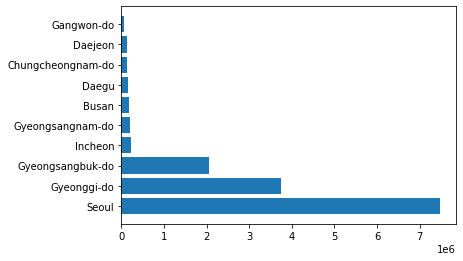

In [24]:
plt.barh(labels,Numgroup)
plt.show()

### จังหวัดที่ติดเชื้อมากที่สุด มีเพศชายและเพศหญิง กี่คน

In [25]:
provinceSeoul = GroupTrue[GroupTrue['province']=='Seoul'] # เลือกจังหวัด seoul เนื่องจากมีผู้ติดเชื้อมาหมี่สุด
provinceSeoul

,patient_id,sex,country,province,state,group,date,time
0,1000000001,male,Korea,Seoul,released,True,2020-01-20,16
1,1000000001,male,Korea,Seoul,released,True,2020-01-21,16
2,1000000001,male,Korea,Seoul,released,True,2020-01-22,16
3,1000000001,male,Korea,Seoul,released,True,2020-01-23,16
4,1000000001,male,Korea,Seoul,released,True,2020-01-24,16
...,...,...,...,...,...,...,...,...
8126034,1000001312,female,Korea,Seoul,isolated,True,2020-06-26,0
8126035,1000001312,female,Korea,Seoul,isolated,True,2020-06-27,0
8126036,1000001312,female,Korea,Seoul,isolated,True,2020-06-28,0
8126037,1000001312,female,Korea,Seoul,isolated,True,2020-06-29,0


In [26]:
provinceSeoul_of_male = provinceSeoul[provinceSeoul['sex']=='male'] # เลือกผู้ติดเชื้อที่เป็นผู้ชาย
provinceSeoul_of_male

,patient_id,sex,country,province,state,group,date,time
0,1000000001,male,Korea,Seoul,released,True,2020-01-20,16
1,1000000001,male,Korea,Seoul,released,True,2020-01-21,16
2,1000000001,male,Korea,Seoul,released,True,2020-01-22,16
3,1000000001,male,Korea,Seoul,released,True,2020-01-23,16
4,1000000001,male,Korea,Seoul,released,True,2020-01-24,16
...,...,...,...,...,...,...,...,...
7419918,1000001198,male,Korea,Seoul,isolated,True,2020-06-26,0
7419919,1000001198,male,Korea,Seoul,isolated,True,2020-06-27,0
7419920,1000001198,male,Korea,Seoul,isolated,True,2020-06-28,0
7419921,1000001198,male,Korea,Seoul,isolated,True,2020-06-29,0


In [27]:
male = provinceSeoul_of_male.groupby('province').count().sort_values(by=['sex'],ascending=False).reset_index()
male = male[['province','sex']] # เลือกคอลัมล์ที่สนใจ
male

,province,sex
0,Seoul,1551760


### เปลี่ยนชื่อคอลัมล์ sex เป็น male

In [28]:
male=male.rename(columns = {'sex':'male'})
male

,province,male
0,Seoul,1551760


In [29]:
provinceSeoul_of_female = provinceSeoul[provinceSeoul['sex']=='female'] # เลือกผู้ติดเชื้อที่เป็นผู้หญิง
provinceSeoul_of_female

,patient_id,sex,country,province,state,group,date,time
24776,1000000005,female,Korea,Seoul,released,True,2020-01-20,16
24777,1000000005,female,Korea,Seoul,released,True,2020-01-21,16
24778,1000000005,female,Korea,Seoul,released,True,2020-01-22,16
24779,1000000005,female,Korea,Seoul,released,True,2020-01-23,16
24780,1000000005,female,Korea,Seoul,released,True,2020-01-24,16
...,...,...,...,...,...,...,...,...
8126034,1000001312,female,Korea,Seoul,isolated,True,2020-06-26,0
8126035,1000001312,female,Korea,Seoul,isolated,True,2020-06-27,0
8126036,1000001312,female,Korea,Seoul,isolated,True,2020-06-28,0
8126037,1000001312,female,Korea,Seoul,isolated,True,2020-06-29,0


In [30]:
female = provinceSeoul_of_female.groupby('province').count().sort_values(by=['sex'],ascending=False).reset_index()
female = female[['province','sex']] # เลือกคอลัมล์ที่สนใจ
female

,province,sex
0,Seoul,5933200


### เปลี่ยนชื่อคอลัมล์ sex เป็น female

In [31]:
female=female.rename(columns = {'sex':'female'})
female

,province,female
0,Seoul,5933200


### รวมตารางจำนวนเพศชายและเพศหญิง ในจังหวัด Seoul

### แสดงจำนวนผู้ติดเชื้อเพศชายและหญิง ในจังหวัดที่มากที่สุด 

In [32]:
SexSeoul = pd.merge(male,female,on='province')# เชื่อมตาราง 
SexSeoul

,province,male,female
0,Seoul,1551760,5933200


### ทำการพล็อตกราฟ

In [33]:
labels = ['Seoul', 'Gyeonggi-do', 'Gyeongsangbuk-do', 'Incheon', 'Gyeongsangnam-do', 'Busan','Daegu','Chungcheongnam-do','Daejeon','Gangwon-do']
Numgroup = [7484960, 3741176, 2044020, 223636, 195111, 172291, 156317, 136920, 135779, 51345]

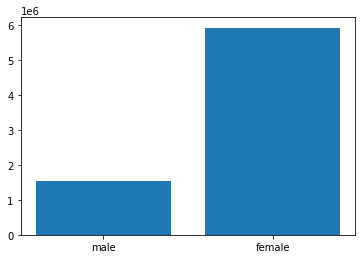

In [34]:
import numpy as np
import matplotlib.pyplot as plt

Sex = ['male','female']
Total = [1551760, 5933200]

plt.bar(Sex,Total)
plt.show()

# ข้อ 2.ทำการ Visualization แสดงจำนวน Country ที่มีจำนวนผู้ป่วยอยู่ในช่วงอายุ 60 ปี ขึ้นไป พร้อมจำนวน และสาเหตุของการติดเชื้อ

## ขั้นตอนที่ 1 ดึงตาราง datamerge ที่รวมไว้ในข้อ 1

In [35]:
datamerge

,patient_id,sex,age,country,province,city_x,infection_case_x,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,case_id,city_y,group,infection_case_y,confirmed_x,latitude,longitude,date,time,confirmed_y,released,deceased
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-20,16,0,0,0
1,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-21,16,0,0,0
2,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-22,16,0,0,0
3,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-23,16,0,0,0
4,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-24,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16972044,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-26,0,19,16,0
16972045,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-27,0,19,16,0
16972046,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-28,0,19,16,0
16972047,7000000019,female,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-29,0,19,16,0


#### ดึงตารางข้อมูล policy จากไดร์ฟ

In [36]:
policy = pd.read_csv(os.path.join(path,'Policy.csv')) 
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


## ขั้นตอนที่ 2 ทำการตรวจ missing value

In [37]:
datamerge.isnull().any()

patient_id            False
sex                   False
age                    True
country               False
province              False
city_x                 True
infection_case_x       True
infected_by            True
contact_number         True
symptom_onset_date     True
confirmed_date         True
released_date          True
deceased_date          True
state                 False
 case_id              False
city_y                False
group                 False
infection_case_y      False
confirmed_x           False
latitude              False
longitude             False
date                  False
time                  False
confirmed_y           False
released              False
deceased              False
dtype: bool

เนื่องจากต้องใช้ข้อมูลในคอลัมล์ age จึงต้องดำเินการแทนค่าด้วย missing

In [38]:
datamerge[['age']] = datamerge[['age']].fillna(datamerge[['age']].dropna().mode().iloc[0,0]) # แทนค่า missing ด้วยค่า mod เนื่องจากข้อมูลมีการกำหนดช่วงเวลาไว้แล้ว

In [39]:
datamerge

,patient_id,sex,age,country,province,city_x,infection_case_x,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,case_id,city_y,group,infection_case_y,confirmed_x,latitude,longitude,date,time,confirmed_y,released,deceased
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-20,16,0,0,0
1,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-21,16,0,0,0
2,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-22,16,0,0,0
3,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-23,16,0,0,0
4,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1000001,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,2020-01-24,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16972044,7000000019,female,20s,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-26,0,19,16,0
16972045,7000000019,female,20s,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-27,0,19,16,0
16972046,7000000019,female,20s,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-28,0,19,16,0
16972047,7000000019,female,20s,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,7000004,from other city,True,Itaewon Clubs,1,-,-,2020-06-29,0,19,16,0


In [40]:

datamerge.isnull().any()

patient_id            False
sex                   False
age                   False
country               False
province              False
city_x                 True
infection_case_x       True
infected_by            True
contact_number         True
symptom_onset_date     True
confirmed_date         True
released_date          True
deceased_date          True
state                 False
 case_id              False
city_y                False
group                 False
infection_case_y      False
confirmed_x           False
latitude              False
longitude             False
date                  False
time                  False
confirmed_y           False
released              False
deceased              False
dtype: bool

In [41]:
policy.isnull().any()

policy_id     False
country       False
type          False
gov_policy    False
detail         True
start_date    False
end_date       True
dtype: bool

In [42]:
policy[['detail']] = policy[['detail']].fillna(policy[['detail']].dropna().mode().iloc[0,0]) # แทนค่า missing ด้วยค่า mod เนื่องจากข้อมูลมีการกำหนดช่วงเวลาไว้แล้ว

In [43]:
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


In [44]:
policy.isnull().any()

policy_id     False
country       False
type          False
gov_policy    False
detail        False
start_date    False
end_date       True
dtype: bool

#### ดึงตารางข้อมูล policy จากไดร์ฟ

## ขั้นตอนที่ 3 ทำการเชื่อมตารางจากข้อที่ 1 และ ตาราง policy  

In [ ]:
datamerge2 = pd.merge(datamerge,policy,on='country')# เชื่อมตาราง Pด้วย .merge ใช้ country  เป็นคีย์
datamerge2